In [101]:
from sklearn.impute import KNNImputer
from Data_binary import *
import numpy as np

In [114]:
# read in the training/test sets
env = Data(unknown_rate=1)
env.loadfile_noshuffle("../MDP/csv_files/partitioned_data/hcv_training.csv")
training_data = np.array([env.data[i][1] for i in range(len(env.data))])

test_env = Data(unknown_rate=1)
test_env.loadfile_noshuffle("../MDP/csv_files/partitioned_data/hcv_test.csv")
test_data = np.array([test_env.data[i][1] for i in range(len(test_env.data)) ])

num_features = len(test_data[0])

costs = read_costs("../MDP/csv_files/partitioned_data/hcv_cost.csv")

print(training_data.shape)

(493, 13)


In [103]:
full = np.nan * np.ones((len(training_data) + len(test_data), num_features ))
partial = np.nan * np.ones((len(training_data) + len(test_data), num_features ))

# populate the training set portion of the matrix
for i in range(len(training_data)):
    partial[i] = np.array(training_data[i])
    full[i] = np.array(training_data[i])
    
for i in range(len(test_data)):
    full[i+len(training_data)] = np.array(test_data[i])

In [104]:
# let's impute using KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputed_partial = imputer.fit_transform(partial)

print("at budget: 0")
print(np.linalg.norm(imputed_partial-full))

at budget: 0
7.078407401870855


In [105]:
def load_steps(fname):
    f = open(fname,'r')
    f = open(fname, 'r')
    lines = f.readlines()
    steps_table = []
    for l in lines:
        s = l.split(',')
        steps = []
        for ss in s:
            steps.append(int(ss))
        steps_table.append(steps)
    return steps_table

In [106]:
m = len(training_data)
N = 10

res1 = []

for i in range(N):
    budget = (i+1)/N
    print("at budget:", budget)
    steps_table = load_steps("../MDP/agent_runs/hcv_tree" + str(i+1) + ".csv")
    # update the steps
    for s in range(len(test_data)):
        for ss in range(len(steps_table[s])):
            cur_update = steps_table[s][ss]
            partial[m+s][cur_update] = test_data[s][cur_update]
    imputed_partial = imputer.fit_transform(partial)
    res1.append(np.linalg.norm(imputed_partial-full))

at budget: 0.1
at budget: 0.2
at budget: 0.3
at budget: 0.4
at budget: 0.5
at budget: 0.6
at budget: 0.7
at budget: 0.8
at budget: 0.9
at budget: 1.0


In [107]:
partial = np.nan * np.ones((len(training_data) + len(test_data), num_features ))

# populate the training set portion of the matrix
for i in range(len(training_data)):
    partial[i] = np.array(training_data[i])
    full[i] = np.array(training_data[i])

In [108]:
m = len(training_data)
N = 10

res2 = []

for i in range(N):
    budget = (i+1)/N
    print("at budget:", budget)
    steps_table = load_steps("../MDP/agent_runs/hcv_rand" + str(i+1) + ".csv")
    
    # update the steps
    for s in range(len(test_data)):
        for ss in range(len(steps_table[s])):
            cur_update = steps_table[s][ss]
            partial[m+s][cur_update] = test_data[s][cur_update]
    imputed_partial = imputer.fit_transform(partial)
    res2.append(np.linalg.norm(imputed_partial-full))

at budget: 0.1
122
at budget: 0.2
122
at budget: 0.3
122
at budget: 0.4
122
at budget: 0.5
122
at budget: 0.6
122
at budget: 0.7
122
at budget: 0.8
122
at budget: 0.9
122
at budget: 1.0
122


In [111]:
partial = np.nan * np.ones((len(training_data) + len(test_data), num_features ))

# populate the training set portion of the matrix
for i in range(len(training_data)):
    partial[i] = np.array(training_data[i])
    full[i] = np.array(training_data[i])
    
m = len(training_data)
N = 10

res3 = []

for i in range(N):
    budget = (i+1)/N
    print("at budget:", budget)
    steps_table = load_steps("../MDP/agent_runs/hcv" + str(float(i+1)) + ".csv")
    #print(len(steps_table))
    # update the steps
    for s in range(len(test_data)):
        for ss in range(len(steps_table[s])):
            cur_update = steps_table[s][ss]
            if(cur_update < num_features):
                partial[m+s][cur_update] = test_data[s][cur_update]
            else:
                continue
    imputed_partial = imputer.fit_transform(partial)
    res3.append(np.linalg.norm(imputed_partial-full))

at budget: 0.1
at budget: 0.2
at budget: 0.3
at budget: 0.4
at budget: 0.5
at budget: 0.6
at budget: 0.7
at budget: 0.8
at budget: 0.9
at budget: 1.0


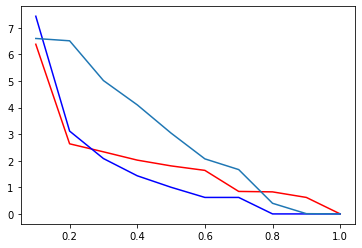

In [112]:
import matplotlib.pyplot as plt

budgets = [(i+1)/N for i in range(N)]
plt.plot(budgets, res1, 'r', budgets, res3, 'b', budgets, res2)
plt.show()